In [1]:
from sqlalchemy import create_engine
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import shared_funcs


In [2]:
sel_cols_map = ['state', 'station_name', 'lat', 'lon', 'ttl_year_avg']
convert_dict_map = {'state': 'string', 'station_name': 'string', 'ttl_year_avg': int}

sel_cols_plot = ['region', 'sub_region', 'state', 'station_name', 'ttl_year_avg']
convert_dict_plot = {'region': 'string', 'sub_region': 'string', 'state': 'string', 'station_name': 'string', 'ttl_year_avg': int}


In [3]:
df_map = pd.read_csv("output_files/data_tenyearavg.csv")
df_plot = pd.read_csv("output_files/data_tenyearavg.csv")


In [4]:
df_map = df_map.astype(convert_dict_map)
df_map = df_map[sel_cols_map].sort_values(by=['ttl_year_avg'], ascending=True)
df_map.reset_index(drop=True, inplace=True)
df_map['text'] = df_map['station_name'] + '<br>PressureDays ' + (df_map['ttl_year_avg']).astype(str)

df_plot = df_plot.astype(convert_dict_plot)
df_plot = df_plot[sel_cols_plot]
df_plot.reset_index(drop=True, inplace=True)
df_plot['text'] = df_plot['region'] + ": " + df_plot['sub_region']


In [5]:
df_map[:120]


,state,station_name,lat,lon,ttl_year_avg,text
0,CA,J. WAYNE APT-ORANGE CO APT,33.680,-117.867,0,J. WAYNE APT-ORANGE CO APT<br>PressureDays 0
1,FL,FT LAUD/HOLLYWOOD INTL APT,26.079,-80.162,0,FT LAUD/HOLLYWOOD INTL APT<br>PressureDays 0
2,HI,LIHUE AIRPORT,21.980,-159.339,0,LIHUE AIRPORT<br>PressureDays 0
3,HI,KAHULUI AIRPORT,20.889,-156.435,0,KAHULUI AIRPORT<br>PressureDays 0
4,HI,HONOLULU INTERNATIONAL AIRPORT,21.324,-157.939,0,HONOLULU INTERNATIONAL AIRPORT<br>PressureDays 0
...,...,...,...,...,...,...
107,NH,MANCHESTER AIRPORT,42.930,-71.436,43,MANCHESTER AIRPORT<br>PressureDays 43
108,MA,GEN E L LOGAN INTERNATIONAL AIRPORT,42.361,-71.010,43,GEN E L LOGAN INTERNATIONAL AIRPORT<br>Pressur...
109,CO,DENVER INTERNATIONAL AIRPORT,39.847,-104.656,46,DENVER INTERNATIONAL AIRPORT<br>PressureDays 46
110,ME,PORTLAND INTERNATIONAL JETPORT AP,43.642,-70.304,48,PORTLAND INTERNATIONAL JETPORT AP<br>PressureD...


In [6]:
df_plot[:120]


,region,sub_region,state,station_name,ttl_year_avg,text
0,MIDWEST,EAST NORTH CENTRAL,IL,ABRAHAM LINCOLN CAPITAL AIRPORT,26,MIDWEST: EAST NORTH CENTRAL
1,MIDWEST,EAST NORTH CENTRAL,IL,CHICAGO MIDWAY INTL ARPT,31,MIDWEST: EAST NORTH CENTRAL
2,MIDWEST,EAST NORTH CENTRAL,IL,CHICAGO O'HARE INTERNATIONAL AIRPORT,30,MIDWEST: EAST NORTH CENTRAL
3,MIDWEST,EAST NORTH CENTRAL,IN,FORT WAYNE INTERNATIONAL AIRPORT,25,MIDWEST: EAST NORTH CENTRAL
4,MIDWEST,EAST NORTH CENTRAL,IN,INDIANAPOLIS INTERNATIONAL AIRPORT,21,MIDWEST: EAST NORTH CENTRAL
...,...,...,...,...,...,...
107,WEST,PACIFIC,HI,LIHUE AIRPORT,0,WEST: PACIFIC
108,WEST,PACIFIC,OR,MAHLON SWEET FIELD AIRPORT,9,WEST: PACIFIC
109,WEST,PACIFIC,OR,PORTLAND INTERNATIONAL AIRPORT,13,WEST: PACIFIC
110,WEST,PACIFIC,WA,SEATTLE-TACOMA INTERNATIONAL AIRPORT,18,WEST: PACIFIC


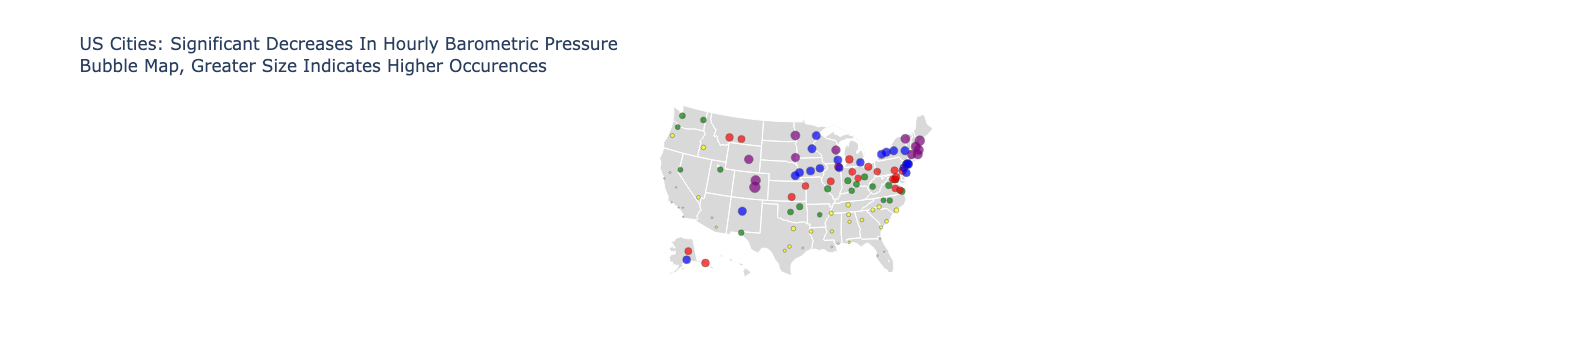

In [28]:
limits = [(0,20),(20,40),(40,60),(60,80),(80,100),(100,120)]
colors = ["white" , "yellow", "green", "red", "blue", "purple"]
cities = []

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df_map[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['ttl_year_avg'],
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = f'US Cities: Significant Decreases In Hourly Barometric Pressure<br>Bubble Map, Greater Size Indicates Higher Occurences',
        showlegend = False,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()


<Axes: xlabel='ttl_year_avg', ylabel='text'>

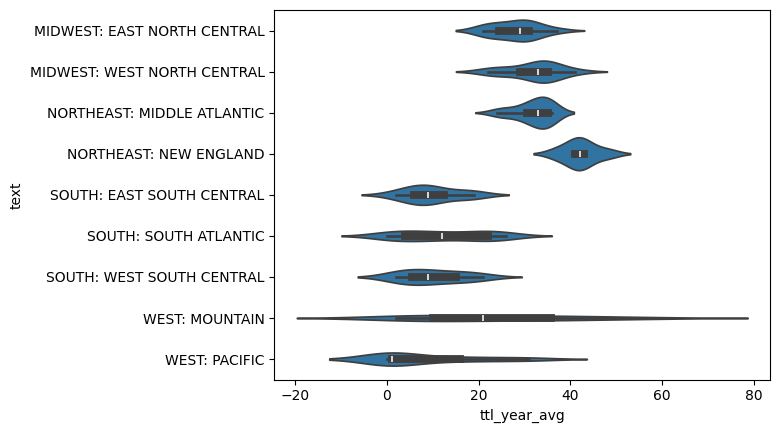

In [16]:
sns.violinplot(data=df_plot, x="ttl_year_avg", y="text")


In [29]:
file = f"USCityPressureDays_bubblemap.pdf"
fig.write_image(file, scale=2)
